In [1]:
""" 
A marker of Alzheimer disease and its use
Gene Id: DJ429574.1 https://www.ncbi.nlm.nih.gov/nuccore/DJ429574.1?report=fasta&log$=seqview 

ALZHEIMER'S DISEASE AMYLOID A4 PROTEIN
PDB Id: 1AAP https://www.rcsb.org/structure/1AAP 
"""
#Pkgs
#pip install biopython
#pip install matplotlib
#pip install pandas
#pip install seaborn        
#pip install nglview

" \nA marker of Alzheimer disease and its use\nGene Id: DJ429574.1 https://www.ncbi.nlm.nih.gov/nuccore/DJ429574.1?report=fasta&log$=seqview \n\nALZHEIMER'S DISEASE AMYLOID A4 PROTEIN\nPDB Id: 1AAP https://www.rcsb.org/structure/1AAP \n"

In [2]:
import Bio
from Bio import SeqIO
marker_record = SeqIO.read("sequence_DJ429574.1.fasta", "fasta")
marker_record

SeqRecord(seq=Seq('GAATTCGGCACGAGGTGAGGCGAGGCCGGGCTCAGGCGAGGGAGATGAGAGACG...AAA'), id='DJ429574.1', name='DJ429574.1', description='DJ429574.1 A marker of Alzheimer disease and its use', dbxrefs=[])

In [3]:
#Seq
marker_dna = marker_record.seq
marker_dna

Seq('GAATTCGGCACGAGGTGAGGCGAGGCCGGGCTCAGGCGAGGGAGATGAGAGACG...AAA')

In [4]:
#bp of DNA
len(marker_dna)

2089

In [5]:
#Transcription
marker_mrna = marker_dna.transcribe()
marker_mrna

Seq('GAAUUCGGCACGAGGUGAGGCGAGGCCGGGCUCAGGCGAGGGAGAUGAGAGACG...AAA')

In [6]:
#Translation 
marker_protein= marker_mrna.translate()
marker_protein

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('EFGTR*GEAGLRRGR*ETAAAAARSPSQRL*AAAGAAPSGSRPACGGGSGGVSR...KKK')

In [7]:
#removal of stop codons (*)
marker_r_stop= marker_protein.split("*")
marker_r_stop = [str(i) for i in marker_r_stop]
marker_r_stop

['EFGTR',
 'GEAGLRRGR',
 'ETAAAAARSPSQRL',
 'AAAGAAPSGSRPACGGGSGGVSRLLFVFSNRAASSSASPEREGGSRGLGREPAEARRRRRHLPLLERGGEAAAAAAAAAAAPGRGSESPVTISRAGNAGELVSPLLLPPTRRRRRRHIQGPGPVLNLPSAAAAPPVARAPEAAGGGSRSEDYSSSPHSAAAAARPLAAEEKQAQSLQPSSSRRSSHYPAAVQSQAAAERGASATAKSRAISILQKKPRHQQLLPSLSSFFFSHRLPDMTAIIKEIVSRNKRRYQEDGFDLDLTYIYPNIIAMGFPAERLEGVYRNNIDDVVRFLDSKHKNHYKIYNLCAERHYDTAKFNCRVAQYPFEDHNPPQLELIKPFCEDLDQWLSEDDNHVAAIHCKAGKGRTGVMICAYLLHRGKFLKAQEALDFYGEVRTRDKKGVTIPSQRRYVYYYSYLLKNHLDYRPVALLFHKMMFETIPMFSGGTCNPQFVVCQLKVKIYSSNSGPTRREDKFMYFEFPQPLPVCGDIKVEFFHKQNKMLKKDKMFHFWVNTFFIPGPEETSEKVENGSLCDQEIDSICSIERADNDKEYLVLTLTKNDLDKANKDKANRYFSPNFKVKLYFTKTVEEPSNPEASSSTSVTPDVSDNEPDHYRYSDTTDSDPENEPFDEDQHTQITKV',
 'IFFYQEG',
 'NTMKINLNKLKKKKKK']

In [8]:
#Amino acid seq and protein length
import pandas as pd
protein= pd.DataFrame(marker_r_stop)
protein['amino acid sequence'] = protein[0].apply(str)
protein['Protein length'] = protein[0].apply(len)
protein.rename(columns={0: "sequence"}, inplace=True)
pro=protein.drop('sequence', axis=1)
pro_= pro.sort_values(by=['Protein length'], ascending=False)
pd.options.display.max_colwidth = 40
import seaborn as sns
df = sns.light_palette("blue", as_cmap=True)
table = pro_.style.background_gradient(cmap=df)
table

,amino acid sequence,Protein length
3,AAAGAAPSGSRPACGGGSGGVSRLLFVFSNRAASSSASPEREGGSRGLGREPAEARRRRRHLPLLERGGEAAAAAAAAAAAPGRGSESPVTISRAGNAGELVSPLLLPPTRRRRRRHIQGPGPVLNLPSAAAAPPVARAPEAAGGGSRSEDYSSSPHSAAAAARPLAAEEKQAQSLQPSSSRRSSHYPAAVQSQAAAERGASATAKSRAISILQKKPRHQQLLPSLSSFFFSHRLPDMTAIIKEIVSRNKRRYQEDGFDLDLTYIYPNIIAMGFPAERLEGVYRNNIDDVVRFLDSKHKNHYKIYNLCAERHYDTAKFNCRVAQYPFEDHNPPQLELIKPFCEDLDQWLSEDDNHVAAIHCKAGKGRTGVMICAYLLHRGKFLKAQEALDFYGEVRTRDKKGVTIPSQRRYVYYYSYLLKNHLDYRPVALLFHKMMFETIPMFSGGTCNPQFVVCQLKVKIYSSNSGPTRREDKFMYFEFPQPLPVCGDIKVEFFHKQNKMLKKDKMFHFWVNTFFIPGPEETSEKVENGSLCDQEIDSICSIERADNDKEYLVLTLTKNDLDKANKDKANRYFSPNFKVKLYFTKTVEEPSNPEASSSTSVTPDVSDNEPDHYRYSDTTDSDPENEPFDEDQHTQITKV,640
5,NTMKINLNKLKKKKKK,16
2,ETAAAAARSPSQRL,14
1,GEAGLRRGR,9
4,IFFYQEG,7
0,EFGTR,5


<BarContainer object of 4 artists>

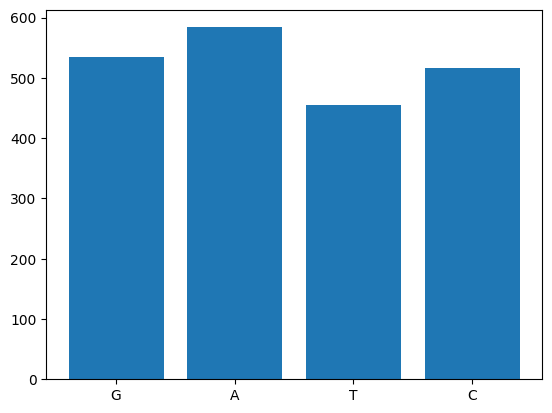

In [9]:
#frequency of nucleotides
from collections import Counter
marker_count = Counter(marker_dna)
import matplotlib.pyplot as plt
plt.bar(marker_count.keys(), marker_count.values())

<BarContainer object of 21 artists>

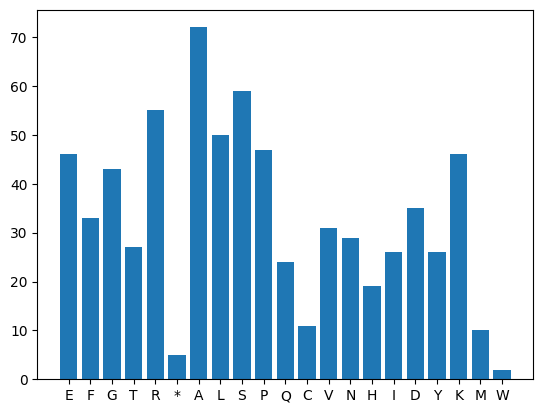

In [10]:
#frequency of proteins
marker_protein_freq = Counter(marker_protein)
plt.bar(marker_protein_freq.keys(), marker_protein_freq.values())

In [11]:
#Molecular weight/GC,AT content
from Bio.SeqUtils import GC,molecular_weight
molecular_weight(marker_dna)
GC(marker_dna) #or 
gc_content =(marker_dna.count('G') + marker_dna.count('C'))/(len(marker_dna)) * 100
gc_content


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


50.26328386787937

In [12]:
def at_content(seq):
    result = float(seq.count("A") + seq.count("T"))/ len(seq) * 100
    return result
at_content(marker_dna)

49.736716132120634

In [13]:
#MeltingTemperature
from Bio.SeqUtils import MeltingTemp as mt
print(mt.Tm_GC(marker_dna))

80.22362969284914


In [14]:
#VISUALIZING 1AAP 3D STRUCTURE 
import py3Dmol
view1 = py3Dmol.view(query = "pdb:1AAP")
view1.setStyle({"cartoon": {"color":"spectrum"}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [15]:
#BLAST
import ssl  #monkey patch
ssl._create_default_https_context = ssl._create_unverified_context

from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

input_file_name = "sequence_DJ429574.1.fasta"
fasta_object = SeqIO.read(input_file_name, format='fasta')
result_handle = NCBIWWW.qblast("blastn", "nt", fasta_object.seq)
blast_record = NCBIXML.read(result_handle)
e_value= 0.01
al= 0
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        al += 1
        if hsp.expect < e_value:
            print("\n")
            print('*ALIGNMENT*')
            print('sequence', alignment.title)
            print('length', alignment.length)
            print('e value', hsp.expect)
            print(hsp.query[0:50])
            print(hsp.match[0:50])
            print(hsp.sbjct[0:50])

print(f"There are", al, "sequences in the BLAST")



*ALIGNMENT*
sequence gi|2039369|gb|U96180.1|HSU96180 Human protein tyrosine phosphatase (TEP1) mRNA, complete cds
length 2089
e value 0.0
GAATTCGGCACGAGGTGAGGCGAGGCCGGGCTCAGGCGAGGGAGATGAGA
||||||||||||||||||||||||||||||||||||||||||||||||||
GAATTCGGCACGAGGTGAGGCGAGGCCGGGCTCAGGCGAGGGAGATGAGA


*ALIGNMENT*
sequence gi|1520682131|ref|NM_001304717.5| Homo sapiens phosphatase and tensin homolog (PTEN), transcript variant 2, mRNA
length 8514
e value 0.0
GTGAGGCGAGGCCGGGCTCAGGCGAGGGAGATGAGAGACGGCGGCGGCCG
||||||||||||||||||||||||||||||||||||||||||||||||||
GTGAGGCGAGGCCGGGCTCAGGCGAGGGAGATGAGAGACGGCGGCGGCCG


*ALIGNMENT*
sequence gi|39644742|gb|BC005821.2| Homo sapiens phosphatase and tensin homolog, mRNA (cDNA clone MGC:11227 IMAGE:3937787), complete cds
length 2357
e value 0.0
GTGAGGCGAGGCCGGGCTCAGGCGAGGGAGATGAGAGACGGCGGCGGCCG
||||||||||||||||||||||||||||||||||||||||||||||||||
GTGAGGCGAGGCCGGGCTCAGGCGAGGGAGATGAGAGACGGCGGCGGCCG


*ALIGNMENT*
sequence gi|1916327|gb|U92436.1|HSU92436 Human mutat

In [16]:
#Dotplot: Pan paniscus phosphatase and tensin homolog (PTEN) which has 82% query cover 
seq1 = marker_dna
seq2_record = SeqIO.read("sequence_XM_033215595.1.fasta", "fasta")
seq2 = seq2_record.seq

import numpy as np

def delta (x,y):
    return 0 if x==y else 1

def M(seq1, seq2, i, j, k):
    return sum(delta(x,y) for x,y in zip (seq1[i:i+k], seq2[j:j+k]))

def makeMatrix(seq1, seq2, k):
    n= len(seq1)
    m= len(seq2)
    return [[M(seq1, seq2,i, j, k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M, t, seq1, seq2, nonblank= chr(0x24A0), blank = " "):
    print("  |"+ seq2)
    print("-"*(2 + len(seq2)))
    for label, row in zip(seq1, M):
        line= "".join(nonblank if s< t else blank for s in row)
        print(label + "|" + line)
        
def dotplot(seq1, seq2, k=1, t=1):
    M = makeMatrix(seq1, seq2, k)
    plotMatrix(M, t, seq1, seq2)

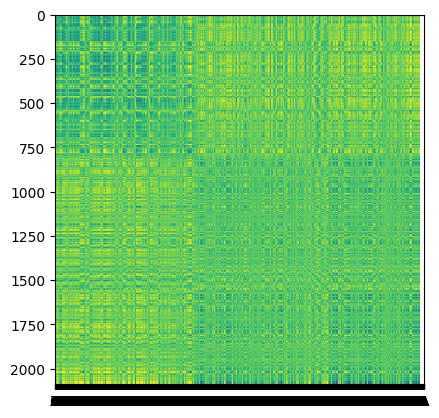

In [17]:
def dotplotx(seq1, seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    #on x-axis list all sequences of seq2 
    xt= plt.xticks(np.arange(len(list(seq2))), list(seq2))
    ##on y-axis list all sequences of seq1 
    yt= plt.xticks(np.arange(len(list(seq1))), list(seq1))
    plt.show()

dotplotx(seq1, seq2)